In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats
from IPython.display import display

In [3]:
## What the data that we'll feed into your model's predict(X) function will look like:
# Notice what the operational_setting_3 column looks like
data=pd.read_csv("predictive_maintenance_dataset.csv").drop(labels=['status', 'unit_number', 'time_stamp'], axis='columns')

In [4]:
data_all=pd.read_csv("predictive_maintenance_dataset.csv")

In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144203 entries, 0 to 144202
Data columns (total 27 columns):
unit_number              144203 non-null int64
time_stamp               144203 non-null object
status                   144203 non-null int64
operational_setting_1    137062 non-null float64
operational_setting_2    137007 non-null float64
operational_setting_3    136976 non-null object
sensor_measurement_1     136994 non-null float64
sensor_measurement_2     137005 non-null float64
sensor_measurement_3     137013 non-null float64
sensor_measurement_4     136868 non-null float64
sensor_measurement_5     136959 non-null float64
sensor_measurement_6     136759 non-null float64
sensor_measurement_7     136990 non-null float64
sensor_measurement_8     136927 non-null float64
sensor_measurement_9     136996 non-null float64
sensor_measurement_10    137012 non-null float64
sensor_measurement_11    137023 non-null float64
sensor_measurement_12    136976 non-null float64
sensor_measur

In [26]:
data_all.head()


,unit_number,time_stamp,status,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,540,2017-02-19 12:00:00,0,42.0007,0.8415,High,445.00,NaN,1362.47,1143.17,...,133.75,2388.50,8129.92,9.1182,NaN,332.0,2212.0,100.00,10.77,6.5717
1,396,2017-11-21 12:00:00,0,-0.0023,0.0004,High,518.67,642.33,1581.03,1400.06,...,522.19,2388.00,8135.70,8.3817,0.03,393.0,2388.0,100.00,39.07,23.3958
2,513,2017-02-12 12:00:00,0,NaN,0.6216,Low,462.54,536.71,1250.87,1037.52,...,163.11,2028.06,7867.90,10.8827,NaN,306.0,1915.0,84.93,14.33,8.6202
3,211,2014-06-05 12:00:00,0,42.0006,NaN,High,NaN,549.28,1349.42,1114.02,...,130.58,2387.71,8074.81,9.3776,0.02,NaN,2212.0,100.00,10.60,6.2614
4,460,2014-11-27 12:00:00,0,-0.0016,0.0004,High,518.67,643.84,1604.53,1431.41,...,519.44,2388.24,8135.95,8.5223,0.03,396.0,2388.0,100.00,38.39,23.0682


In [6]:
data_all.shape

(144203, 27)

Sample is 144203 with 27 features 

In [20]:
data_all['status'].value_counts()

0    143570
1       633
Name: status, dtype: int64

In [22]:
# From above I can see there is an unbalanced data set. 0 and 1 

In [ ]:
# TO check the missing values 

In [29]:
data.isnull().sum()

operational_setting_1    7141
operational_setting_2    7196
operational_setting_3    7227
sensor_measurement_1     7209
sensor_measurement_2     7198
sensor_measurement_3     7190
sensor_measurement_4     7335
sensor_measurement_5     7244
sensor_measurement_6     7444
sensor_measurement_7     7213
sensor_measurement_8     7276
sensor_measurement_9     7207
sensor_measurement_10    7191
sensor_measurement_11    7180
sensor_measurement_12    7227
sensor_measurement_13    7115
sensor_measurement_14    7068
sensor_measurement_15    7257
sensor_measurement_16    7059
sensor_measurement_17    7167
sensor_measurement_18    7265
sensor_measurement_19    7195
sensor_measurement_20    7018
sensor_measurement_21    7165
dtype: int64

###  To get the see the no of missing values  

### Now to get a brief distribution of the data set  to see if we select median or mean for the missing values 

/anaconda/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in absolute
  prob = 2 * distributions.t.sf(np.abs(t), df)


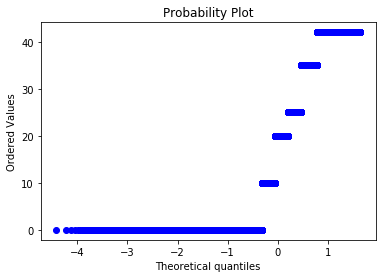

In [8]:
measurements = data['operational_setting_1']
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

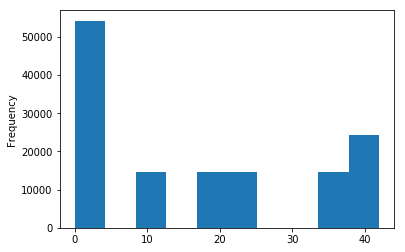

In [9]:
measurements.plot.hist()

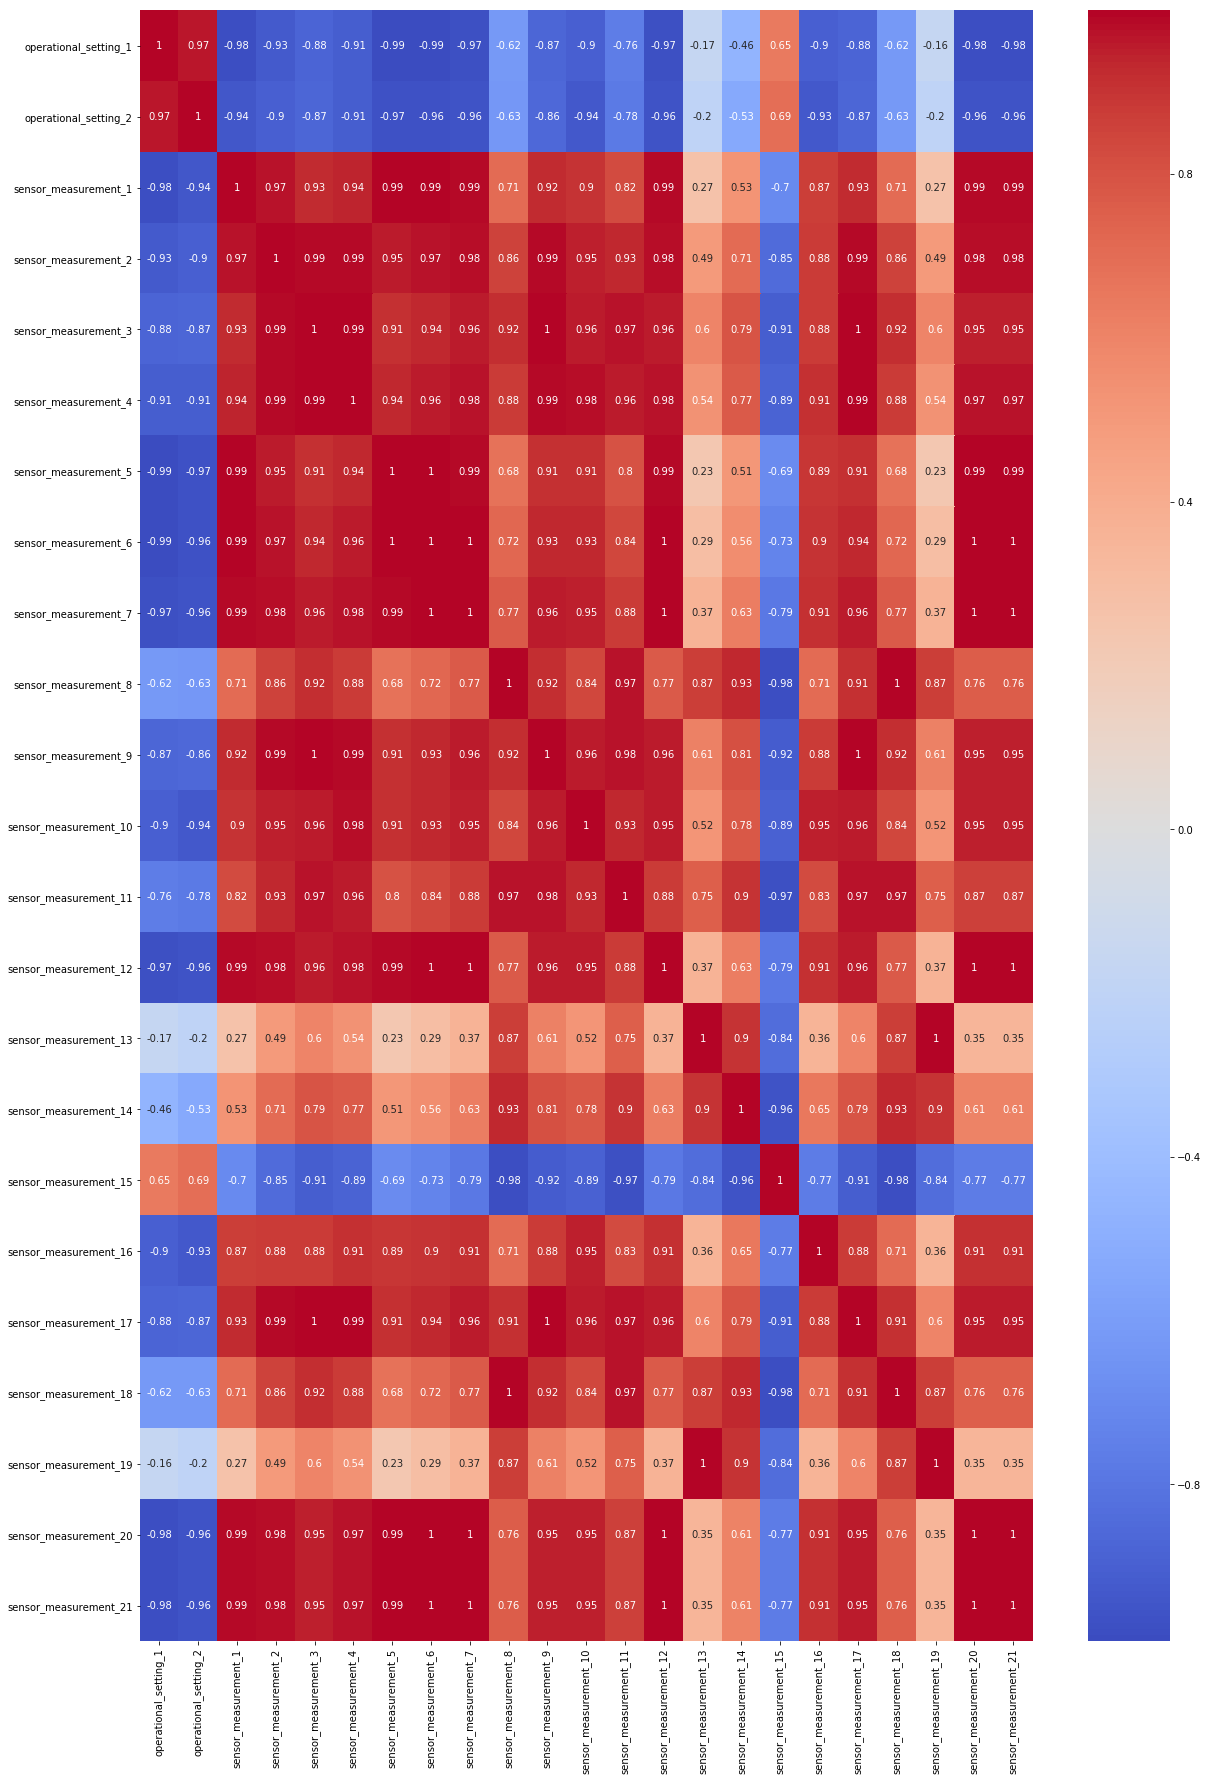

In [19]:
plt.figure(figsize=(20,30))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

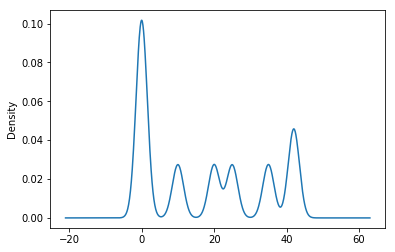

In [20]:
data['operational_setting_1'].plot.kde()

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


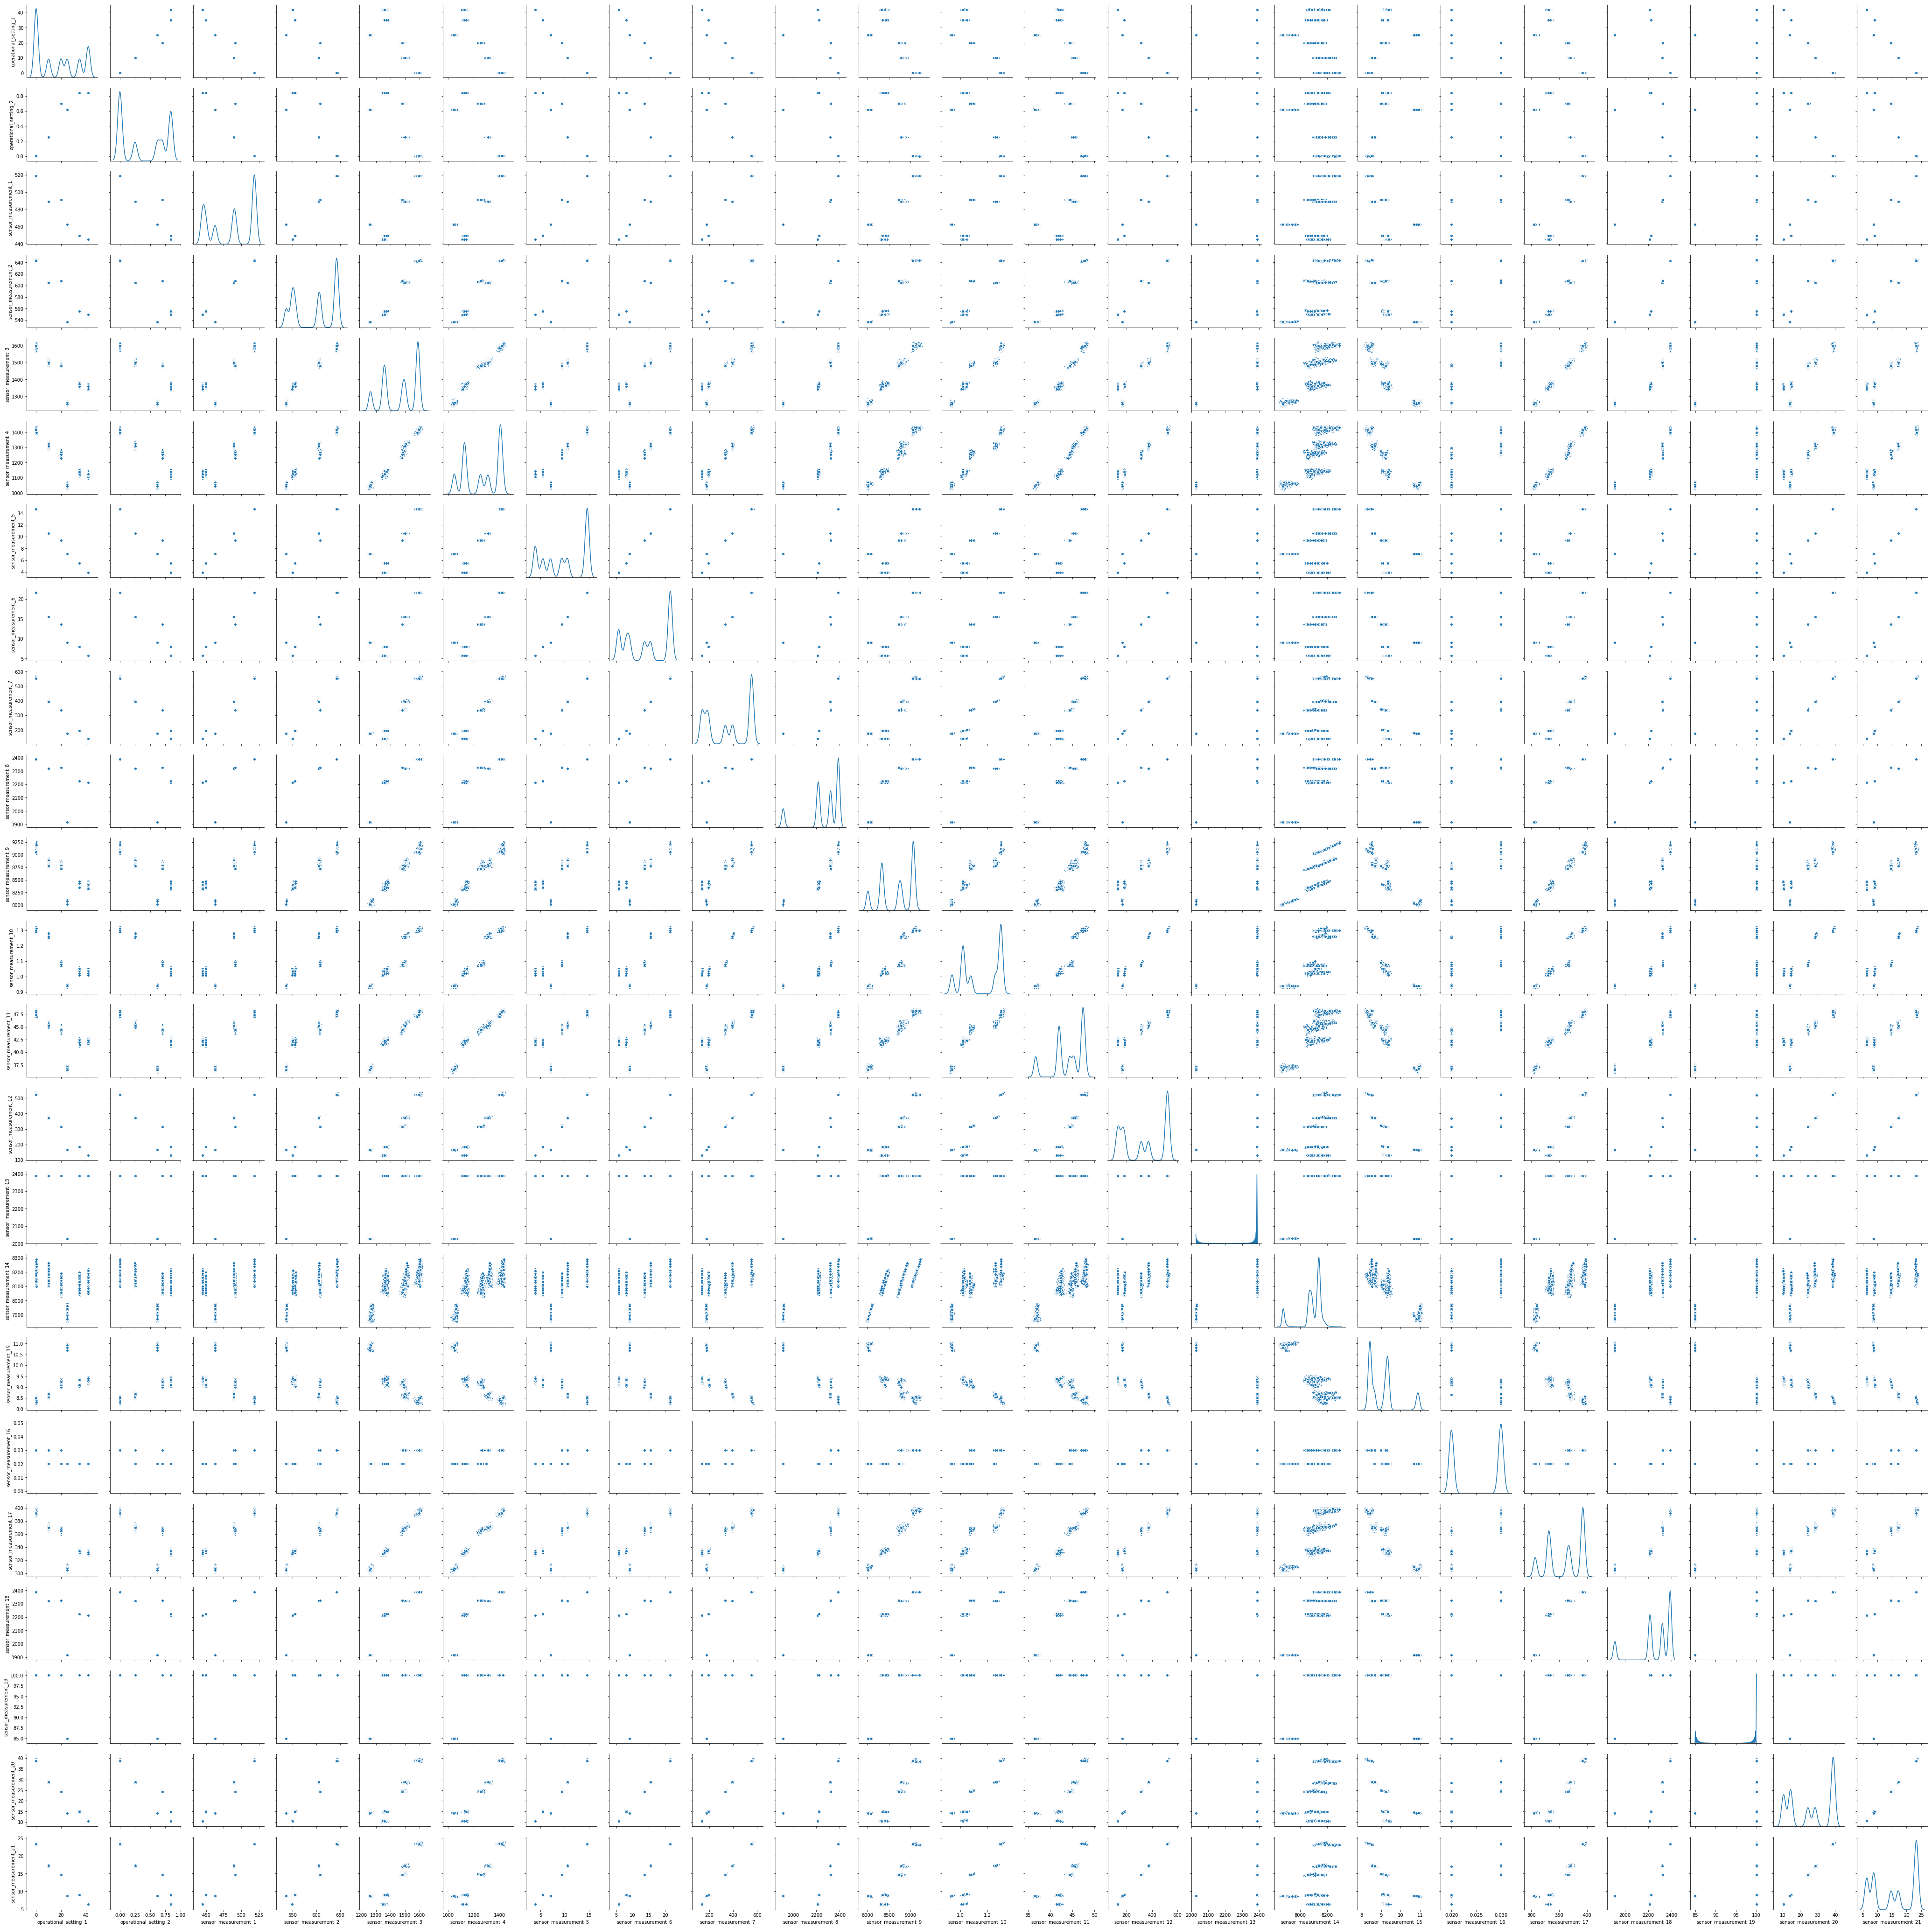

In [30]:
sns.pairplot(data,diag_kind="kde")

In [29]:
?sns.pairplot


In [21]:
%load_ext rpy2.ipython

In [23]:
%%R
library(tidyverse)

### For imputation dividing the data into categorical and contious variable 

In [33]:
cols = data.columns
num_cols = data._get_numeric_data().columns
num_cols

Index(['operational_setting_1', 'operational_setting_2',
       'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9',
       'sensor_measurement_10', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_16', 'sensor_measurement_17',
       'sensor_measurement_18', 'sensor_measurement_19',
       'sensor_measurement_20', 'sensor_measurement_21'],
      dtype='object')

In [34]:
list(set(cols) - set(num_cols))

['operational_setting_3']

In [38]:
contious_variables=data.drop('operational_setting_3', axis=1)

In [40]:
median_of_columns = contious_variables.notnull()

In [44]:
median_of_columns_1 = median_of_columns.mean()

In [45]:
median_of_columns_1

operational_setting_1    0.950480
operational_setting_2    0.950098
sensor_measurement_1     0.950008
sensor_measurement_2     0.950084
sensor_measurement_3     0.950140
sensor_measurement_4     0.949134
sensor_measurement_5     0.949765
sensor_measurement_6     0.948378
sensor_measurement_7     0.949980
sensor_measurement_8     0.949543
sensor_measurement_9     0.950022
sensor_measurement_10    0.950133
sensor_measurement_11    0.950209
sensor_measurement_12    0.949883
sensor_measurement_13    0.950660
sensor_measurement_14    0.950986
sensor_measurement_15    0.949675
sensor_measurement_16    0.951048
sensor_measurement_17    0.950299
sensor_measurement_18    0.949620
sensor_measurement_19    0.950105
sensor_measurement_20    0.951332
sensor_measurement_21    0.950313
dtype: float64